<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/Lab12/lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving date_promovare_examen.csv to date_promovare_examen (1).csv
Distribuția clasei 'Promovare':
Promovare
1    0.5
0    0.5
Name: proportion, dtype: float64
Datele sunt balansate.


Output()

Output()

ERROR:pymc.stats.convergence:There were 3004 divergences after tuning. Increase `target_accept` or reparameterize.


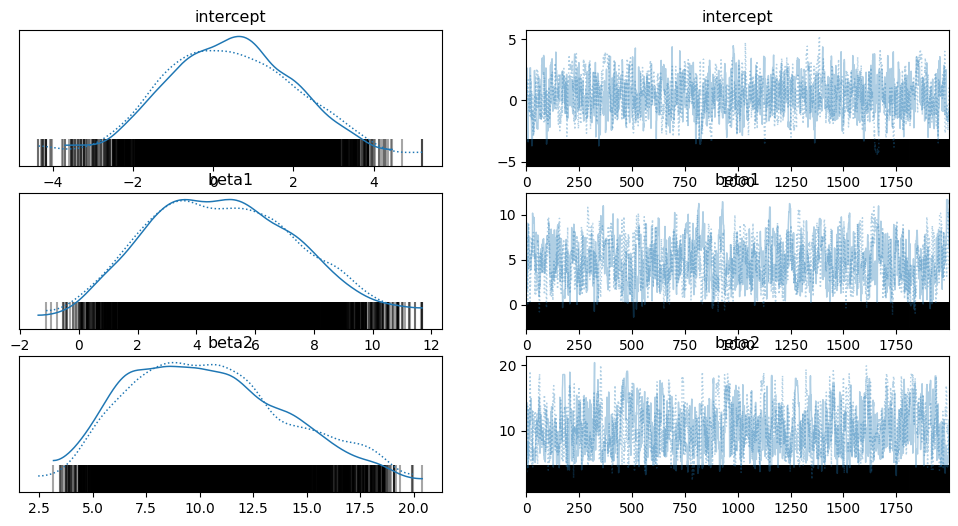

             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept   0.399  1.578  -2.371    3.365      0.065    0.050     575.0   
beta1       4.864  2.451   0.249    9.073      0.115    0.081     446.0   
beta2      10.378  3.551   4.366   17.113      0.159    0.116     524.0   

           ess_tail  r_hat  
intercept     673.0    1.0  
beta1         699.0    1.0  
beta2         741.0    1.0  
Granița de decizie medie este: -0.02617766697283821
Orele de somn influențează mai mult promovabilitatea.


In [15]:


import pandas as pd
import pymc as pm
import arviz as az
from matplotlib import pyplot as plt

# Încarcă fișierul în Google Colab
from google.colab import files
uploaded = files.upload()

# Citirea fișierului încărcat
data = pd.read_csv("date_promovare_examen.csv")

# Verificarea balanței datelor
print("Distribuția clasei 'Promovare':")
class_distribution = data['Promovare'].value_counts(normalize=True)
print(class_distribution)

# Verificare dacă datele sunt balansate
if abs(class_distribution[0] - class_distribution[1]) <= 0.1:
    print("Datele sunt balansate.")
else:
    print("Datele nu sunt balansate.")

# Definirea variabilelor
x1 = data["Ore_Studiu"].values  # Numărul de ore de studiu
x2 = data["Ore_Somn"].values    # Numărul de ore de somn
y = data["Promovare"].values    # Variabila țintă (1 - promovat, 0 - nep)

# Normalizarea variabilelor independente
x1 = (x1 - x1.mean()) / x1.std()
x2 = (x2 - x2.mean()) / x2.std()

# Construirea modelului de regresie logistică Bayesiană
with pm.Model() as model:
    # Priori pentru coeficienți și intercept
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    beta2 = pm.Normal("beta2", mu=0, sigma=10)

    # Log-odds (logistica)
    logit_p = intercept + beta1 * x1 + beta2 * x2

    # Transformarea logit-ului în probabilitate
    p = pm.Deterministic("p", pm.math.sigmoid(logit_p))

    # Observații bazate pe probabilitate
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y)

    # Eșantionare
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Vizualizarea rezultatelor
az.plot_trace(trace, var_names=["intercept", "beta1", "beta2"])
plt.show()

# Rezumatul rezultatelor
summary = az.summary(trace, var_names=["intercept", "beta1", "beta2"])
print(summary)

# Determinarea graniței de decizie (probabilitate = 0.5)
mean_intercept = summary.loc["intercept", "mean"]
mean_beta1 = summary.loc["beta1", "mean"]
mean_beta2 = summary.loc["beta2", "mean"]

decision_boundary = -mean_intercept / (mean_beta1 + mean_beta2)
print(f"Granița de decizie medie este: {decision_boundary}")

# Identificarea factorului cu cea mai mare influență
if abs(mean_beta1) > abs(mean_beta2):
    print("Orele de studiu influențează mai mult promovabilitatea.")
else:
    print("Orele de somn influențează mai mult promovabilitatea.")
